In [67]:
# Import Liabries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [51]:
# Load the dataset

df = pd.read_csv(r"D:\Project work\Hackerthon\Financial_Risk_Participants_Data\Train.csv")

In [52]:
df.head(5)

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0     2           8.032                    14                     8   
1    31          77.730                     8                     3   
2    40          59.203                     3                    12   
3    12          73.080                     4                     5   
4     4          15.666                    13                    15   

   Fin_Score  Loss_score  Past_Results  IsUnderRisk  
0          3           6             0            1  
1          3           8             1            0  
2         11           3             0            1  
3          7           6             0            0  
4          6           7             2            1

In [53]:
# check shape of data
df.shape

(543, 8)

#  Exploratory Data Analysis

In [54]:
# Check Data Types

df.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [55]:
# Check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [56]:
# summary statistics
df.describe().transpose()

count       mean        std    min     25%     50%  \
City                  543.0  19.576427  14.722687  0.000   6.000  14.000   
Location_Score        543.0  32.259346  24.887291  5.185  13.565  19.803   
Internal_Audit_Score  543.0   8.189687   3.312022  3.000   6.000   8.000   
External_Audit_Score  543.0   7.327808   3.450667  3.000   5.000   7.000   
Fin_Score             543.0   7.046041   3.156978  3.000   5.000   7.000   
Loss_score            543.0   5.530387   1.839124  3.000   4.000   6.000   
Past_Results          543.0   0.613260   0.764509  0.000   0.000   1.000   
IsUnderRisk           543.0   0.626151   0.484270  0.000   0.000   1.000   

                         75%     max  
City                  37.000  44.000  
Location_Score        62.594  80.809  
Internal_Audit_Score  11.000  15.000  
External_Audit_Score  10.000  15.000  
Fin_Score              8.000  15.000  
Loss_score             7.000  13.000  
Past_Results           1.000  10.000  
IsUnderRisk            1.000   1.000

In [11]:
# Pandas Profiling

from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# SweetViz

import sweetviz as sv
report = sv.analyze(df)
report.show_html('iris.html')

                                             |                                             | [  0%]   00:00 ->…

Report iris.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [57]:
# Pivot Table
df.pivot_table(index='IsUnderRisk')

City  External_Audit_Score  Fin_Score  Internal_Audit_Score  \
IsUnderRisk                                                                     
0            21.241379              5.384236   5.566502              5.679803   
1            18.582353              8.488235   7.929412              9.688235   

             Location_Score  Loss_score  Past_Results  
IsUnderRisk                                            
0                 45.901695    5.423645      0.512315  
1                 24.114062    5.594118      0.673529

Target Value Counts

In [58]:
# check target balance
df['IsUnderRisk'].value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

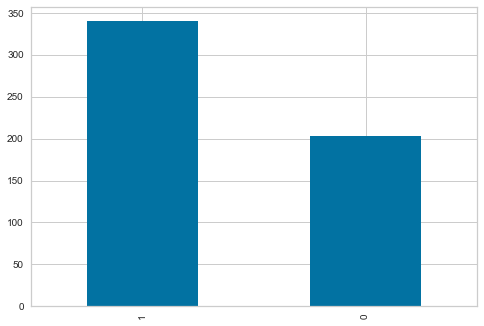

In [59]:
# bar plot
df['IsUnderRisk'].value_counts().plot.bar();

# Analyze Target Variable on Features

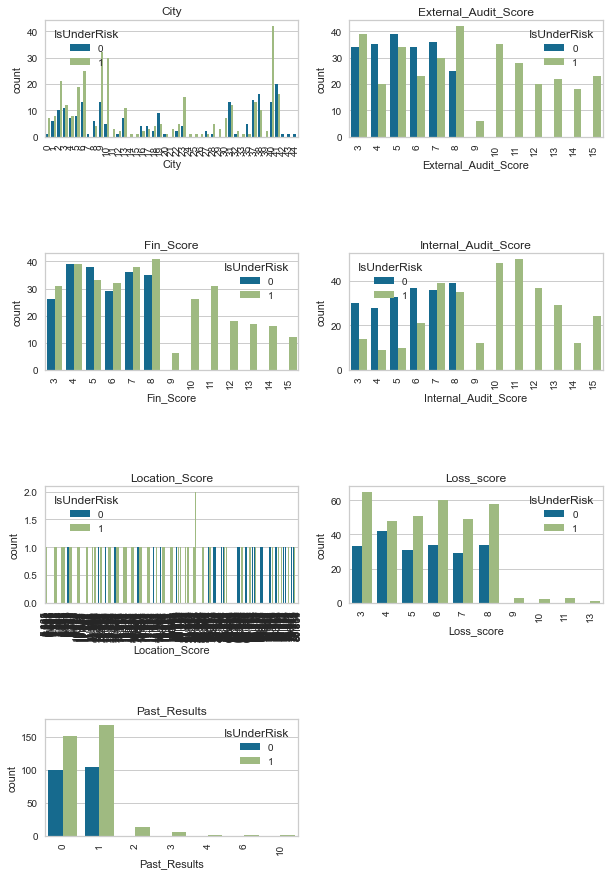

In [20]:
features=['City', 'External_Audit_Score', 'Fin_Score', 'Internal_Audit_Score', 'Location_Score', 'Loss_score', 'Past_Results']

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='IsUnderRisk')
    plt.xticks(rotation=90)
    plt.title(j)

# Check Missing Values

In [60]:
df.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

# PyCaret

In [9]:
from pycaret.classification import *
s = setup(df, target = 'IsUnderRisk', session_id = 123)

In [10]:
best_model = compare_models()

In [11]:
# check hold-out score
predict_model(best_model);

Text(0.5, 1.0, 'Target variable count')

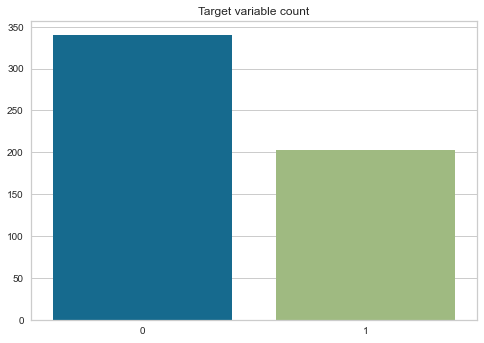

In [22]:
x=df['IsUnderRisk'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [61]:


# This dataset is huge, so let's take a sample to speed things up
# df = df.sample(frac=0.5, replace=False, random_state=1, axis=0)
X = df.drop(['IsUnderRisk'], axis=1)
y = df['IsUnderRisk']





In [62]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 272, 0: 162})
After Counter({1: 272, 0: 272})


In [68]:
# Split the dataset

X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)


# Model

In [69]:
# Helper function to print out the results of hyperparmater tuning in a nice table.

def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    #results['mean_fit_time'] = cv_results['mean_fit_time']
    #results['mean_score_time'] = cv_results['mean_score_time']
    #results['mean_train_score'] = cv_results['mean_train_score']
    #results['std_train_score'] = cv_results['std_train_score']
    results['mean_val_score'] = cv_results['mean_test_score']
    #results['std_val_score'] = cv_results['std_test_score']
    results['rank_val_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_val_score'], ascending=False)
    return results

In [70]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, random_state=0)

scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

Mean Accuracy: 0.8306


# Grid Search

In [71]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced', None), 
          'max_depth': [2, 5, 10, 20], 
          'min_samples_leaf': [1, 5, 10],
          'max_features':[0.25, 0.5, 0.75, 1.0]}

search = GridSearchCV(clf, params, scoring='f1_macro', cv=10, verbose=1)
search = search.fit(X_train, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:   16.6s finished


In [72]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        41
           1       0.92      0.82      0.87        68

    accuracy                           0.84       109
   macro avg       0.83      0.85      0.84       109
weighted avg       0.85      0.84      0.85       109



# Test Data Set

In [80]:
df_test = pd.read_csv(r"D:\Project work\Hackerthon\Financial_Risk_Participants_Data\Test.csv")

In [81]:
df_test.head(5)

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0    41          18.272                    13                    12   
1    17          64.799                     6                    10   
2    31          68.890                     3                     3   
3     3          16.492                    15                    10   
4     9          17.178                     7                     3   

   Fin_Score  Loss_score  Past_Results  
0          9           7             0  
1          7           4             1  
2          7           8             0  
3          7           4             1  
4          8           3             1

In [42]:
df_test.shape

(233, 7)

In [84]:
test_for_prediction = df_test[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']]

In [76]:
y_pred_test

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [89]:

prediction_from_dt  = search.predict_proba(test_for_prediction)
df_prediction_from_dt = pd.DataFrame(prediction_from_dt)
df_prediction_from_dt.to_csv("Final_output_prediction_from_dt.csv")